# 학습과정 이야기

1. 배치사이즈와 에포크
2. batch_size(배치사이즈)
3. epchos(에포크)


## 1. 배치사이즈와 에포크

In [ ]:
model.fit(x, y, batch_size=32, epochs=10)

|<font size="6">인자 종류</font>|<font size="6">케라스 경우</font>|<font size="6">모의고사 경우</font>|
|-------|--------|----------|
|<font size="6">x</font>|<font size="6">입력 데이터</font>|<font size="6">100문항 문제</font>|
|<font size="6">y</font>|<font size="6">라벨값</font>|<font size="6">100문항 정답</font>|
|<font size="6">batch_size</font>|<font size="6">몇 개의 샘플로 가중치를<BR> 갱신할 것인지 지정</font>|<font size="6">몇 문항을 풀고 <BR>답을 맞춰볼지 정하는 것</font>|
|<font size="6">epochs</font>|<font size="6">학습 반복 횟수</font>|<font size="6">학습 반복 횟수</font>|



![배치사이즈와 에포크](./images/batch_ephochs.png)

### batch_size (배치사이즈)

* 전체 문제에서 몇 문항을 풀고 해답을 맞추는 지를 의미<BR>
* 100문항일 때, 배치사이즈가 100이면 전체를 다 풀고 난 뒤에 해답을 맞춰보는 것<BR>
* 우리가 해답을 맞춰볼 때 ‘아하, 이렇게 푸는구나’라고 느끼면서 학습하는 것처럼 모델도 이러한 과정을 통해 가중치가 갱신됩니다.<BR>

1. 문제를 푼 뒤 해답과 맞춰봐야 학습이 일어납니다.
2. 모델의 결과값과 주어진 라벨 값과의 오차를 줄이기 위해, `역전파(Backpropagation)` 알고리즘으로 가중치가 갱신됩니다.

전체 문제를 푼 뒤 해답과 맞추므로 이 때 가중치 갱신은 한 번만 일어납니다.

|batch size 100|batch size 10|batch size 1|
|-----|-----|-----|
|![batchsize100](./images/batchsize100.png)|![batchsize10](./images/batchsize10.png)|![batchsize1](./images/batchsize1.png)|

100문제 다 풀고 해답을 맞히는 것과 1문제씩 풀고 해답을 맞히는 것의 차이?

* 모의고사 1회분에 비슷한 문항이 있다고 가정했을 때, <BR>
<BR>
* 배치사이즈가 100일 때<BR>
다 풀어보고 해답을 맞춰보기 때문에 유사 문제를 모두 틀릴 가능성<BR>
<BR>
* 배치사이즈가 1일 때<BR>
한 문제씩 풀어보고 해답을 맞춰보기 때문에 유사문제 중 첫 문제를 틀렸다고<BR> 
하더라도 해답을 보면서 학습하게 되므로 나머지 문제는 맞추게 됩니다.<BR>

### epochs(에포크)

* 에포크는 모의고사 1회분을 몇 번 풀어볼까
* 즉 100문항의 문제들을 몇 번이나 반복해서 풀어보는 지 정하는 것
* 에포크가 20이면 모의고사 1회분을 20번 푸는 것

같은 문제집이라도 반복해서 풀면 학습이 일어납니다.

아래 그래프에서 세로축이 100문항 중 틀린 개수이고, 가로축이 모의고사 풀이 반복횟수입니다.<BR>
풀이를 반복할수록 틀린 개수가 적어지는 것을 보실 수 있습니다.<BR>
처음에는 틀린 개수가 확 적어지만 반복이 늘어날수록 완만하게 틀린 개수가 줄어듭니다.<BR>
우리가 공부할 때도 낮은 점수에서는 공부를 조금하면 점수가 확 오르지만, 높은 점수에서 1~2점 올리는 것이 쉽지 않은 것과 비슷할 수 있습니다.<BR>

In [2]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
# Common imports
import numpy as np
import os
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

![epochs](./images/epochs.png)

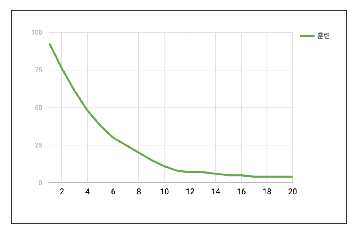

In [19]:
img = plt.imread("./images/epochs.png")
plt.xticks([])
plt.yticks([])
plt.imshow(img)

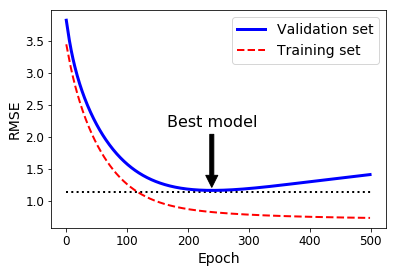

In [31]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()